# Reproducibility, Callbacks, and TensorBoard
<!--<badge>--><a href="https://colab.research.google.com/github/TheAIDojo/AI_4_Climate_Bootcamp/blob/main/Week 02 - Optimization and Regularization/3. Reproducibility, Callbacks, and Tensorboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->

We will be diving into the concepts of reproducibility, monitoring and analyzing the training process using TensorBoard.
The ability to reproduce the results of a model is crucial for scientific research and the development of machine learning models. It allows for the verification of results, the identification of bugs, and the ability to reproduce results for further experimentation.

We will begin by setting random seeds to ensure reproducibility across libraries such as TensorFlow, NumPy, and scikit-learn.
Then, we will explore how to save and load models using TensorFlow's model persistence API. This will allow us to save and load the weights and architecture of a model for further use.

Finally, we will look at TensorBoard, a visualization tool for monitoring the training process and analyzing the performance of our models. We will learn how to use TensorBoard to track metrics such as accuracy, loss, and gradients, which will help us to understand the performance of our models and identify any issues that may be occurring during training.

By the end of this tutorial, you will have a solid understanding of the importance of reproducibility and model persistence, as well as the use of TensorBoard for monitoring and analyzing the training process.

## Table of Contents <a name="toc"></a>
* [Reproducibility](#reprod)
* [Keras Callbacks](#callbacks)
* [TensorBoard](#tensorboard)
* [Fashion MNIST](#example)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

## Reproducibility <a name="reprod"></a>
[Back to Top](#toc)

Reproducibility is a crucial aspect of scientific research and machine learning development. It ensures that results can be verified, bugs can be identified, and experimentation can be repeated. In order to achieve reproducibility in TensorFlow and machine learning in general, it is important to set random seeds.

In TensorFlow, the random seed can be set using the tf.random.set_seed() function. This function should be called before any other TensorFlow operations are used. For example, to set the seed to 42, we can do:

```
tf.random.set_seed(42)
```

In addition to setting the random seed in TensorFlow, it is also important to set the random seed in other libraries such as NumPy and scikit-learn. In NumPy, we can set the seed using `np.random.seed(42)`, and in scikit-learn, we can set the seed using `random_state=42` in the initialization of an estimator or other functions that introduce randomness like `train_test_split` with shuffling enabled.

It's also important to record the versions of all libraries used and the system details. This can be done using `pip freeze > requirements.txt` or `conda list > environment.yml`

By setting the random seed across all libraries and recording the versions of libraries and system details, we can ensure that results can be easily reproduced.



In [4]:
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=seed)

### Keras Callbacks  <a name="callbacks"></a>
[Back to Top](#toc)

Keras callbacks are a powerful tool for monitoring and customizing the training process of a model. We briefly touched on the subject when we used EarlyStopping as a regularization technique in earlier lectures, but now we will delve deeper into the capabilities of callbacks and see how they can help us improve the reproducibility and monitoring of our models.

Callbacks in Keras are functions that are applied at certain stages of the training process, such as at the end of each epoch, or when training is about to begin. These functions can be used to perform a variety of tasks, such as saving the model's weights, early stopping, and logging to TensorBoard.

In this companion code, we will explore the different types of callbacks available in Keras and see how they can be used to improve the reproducibility and monitoring of our models. We will use callbacks to save the model's weights, monitor training metrics, and log data to TensorBoard.

It's important to note that callbacks can be used in conjunction with other techniques such as setting random seeds to ensure reproducibility. With the help of callbacks, we can have more control over the training process and be able to better understand and optimize our models.

#### Types of Callbacks

Some of the most common callbacks built into Keras include the following:

* **ModelCheckpoint**: saves the model after every epoch or at a specified frequency, allowing you to save only the best performing models.
* **EarlyStopping**: stops training when a certain metric, such as validation loss, stops improving after a specified number of epochs.
* **TensorBoard**: allows you to visualize metrics and model architecture in TensorFlow's TensorBoard.
* **CSVLogger**: saves the training metrics to a CSV file, allowing you to easily track performance over time.
* **LearningRateScheduler**: allows you to schedule the learning rate to change over time, such as starting with a high learning rate and decreasing it over time.

To learn more, check out the full list at Keras Callbacks [docs](https://tensorflow.org/api_docs/python/tf/keras/callbacks/callback), you can also find custom written callbacks posted on GitHub suchs as [Telegram notification callback](https://github.com/qubvel/keras_telegram_callback), you can also write your own by extending the `Callback` class as outlined in this [tutorial](https://www.tensorflow.org/guide/keras/custom_callback).

### Introduction to Tensorboard  <a name="tensorboard"></a>
[Back to Top](#toc)

Tensorboard is a powerful tool developed by TensorFlow team that allows us to visualize and analyze our model's training process. It provides a dashboard of various visualizations such as scalars, histograms, distributions, and more, that can help us understand how our model is performing during training and identify potential issues.

Some key features of Tensorboard include:

- **Scalars**: Allows us to track the progress of our model's training by plotting metrics such as loss, accuracy, and learning rate over time.
- **Histograms**: Helps us to understand the distribution of our model's parameters and gradients, which can be useful for identifying issues such as vanishing gradients.
- **Distributions**: Similar to histograms, it helps to understand the distribution of the parameters and gradients.
- **Images**: Allows us to view images generated by our model, which can be useful for identifying issues such as overfitting.

Overall, Tensorboard is an essential tool for monitoring and analyzing the performance of our models during training. It can help us identify issues early on and make necessary adjustments to our model to improve its performance.

You can learn more about Tensorboard by visiting its official documentation [here](https://www.tensorflow.org/tensorboard)

### Fashion MNIST  <a name="example"></a>
[Back to Top](#toc)
In this section, we will put everything we have learned about reproducibility, callbacks, and TensorBoard into practice by creating an end-to-end code example. We will use the popular Fashion MNIST dataset, which consists of image of 10 different articles of clothing, and will create a simple feed forward neural networks to classify them.

First, we will set the random seeds for reproducibility and load the dataset. Then, we will define our model architecture and compile it with appropriate loss function and metrics. We will then create an instance of the TensorBoard callback, which will allow us to visualize and monitor the training process. Additionally, we will create an instance of the ModelCheckpoint callback to save the best model weights.

Next, we will train the model using the fit() method and passing in our callbacks as arguments. After training, we will evaluate the model on the test set and save the results. Finally, we will use the TensorBoard callback to launch TensorBoard and visualize the training process.

In [14]:
# set the random seed
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

In [15]:
# Load and preprocess the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train.shape, y_train.shape, x_test.shape, y_train.shape

4422102/4422102 [==============================] - 1s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (60000,))

In [16]:
# Pick a random image index
index = np.random.randint(0, x_train.shape[0])

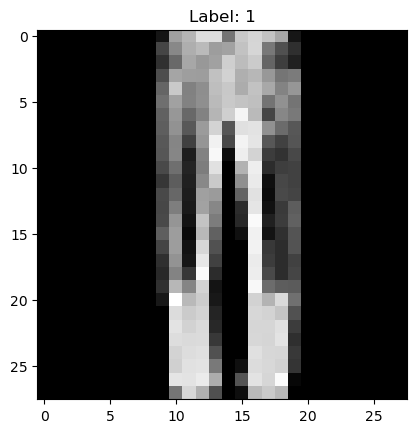

In [17]:
# Plot the image
plt.imshow(x_train[index], cmap="gray")
plt.title("Label: " + str(y_train[index]))
plt.show()

In [18]:
# reshape the data to be in the format (batch_size, input_dim) because Dense layers require one dimensional input
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [19]:
# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [20]:
# convert the labels from integers to categorical using one hot encoding
depth = len(set(y_train))  # calculate the number of classes to use as depth
y_train = tf.one_hot(y_train, depth=depth)
y_test = tf.one_hot(y_test, depth=depth)

y_train.shape, y_test.shape

(TensorShape([60000, 10]), TensorShape([10000, 10]))

In [ ]:
# Note that TensorFlow uses a stateful random number generator, so you need to set the seed before each model intalization to get reproducible results
tf.random.set_seed(seed)

In [21]:
# fetch the input shape, i.e. the number of features
input_shape = x_train.shape[1]  # input_shape = 784

model = tf.keras.Sequential(
    [
        # input layer
        tf.keras.layers.Input(shape=(input_shape)),
        # hidden layers
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.3),
        # output layer
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [22]:
loss_fn = tf.losses.CategoricalCrossentropy()
optimizer = tf.optimizers.Adam(learning_rate=0.001)
metrics = [tf.keras.metrics.CategoricalAccuracy()]

# Compile the model
model.compile(optimizer=optimizer, loss=loss_fn, metrics=metrics)

In [23]:
# import datetime, a built-in python module for working with dates and times, we will use it to define a unique folder for each experiment
import datetime

# Get current date and time for unique logdir name
now = datetime.datetime.now()
now_formatted = now.strftime("%Y_%m_%d_%H_%M_%S")
logdir = f"logs/fit/{now_formatted}"

# Define Tensorboard callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

# Define Early Stopping callback
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=5
)

# Define Model Checkpoint callback
model_path = f"models/fit/{now_formatted}/best_model.h5"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_path, monitor="val_loss", save_best_only=True
)

In [24]:
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    validation_data=(x_test, y_test),
    callbacks=[
        tensorboard_callback,
        early_stopping_callback,
        model_checkpoint_callback,
    ],
)

Epoch 1/10


2023-01-25 16:19:07.863291: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 5s 3ms/step - loss: 0.5514 - categorical_accuracy: 0.8025 - val_loss: 0.4282 - val_categorical_accuracy: 0.8435
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4104 - categorical_accuracy: 0.8515 - val_loss: 0.4268 - val_categorical_accuracy: 0.8484
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3783 - categorical_accuracy: 0.8620 - val_loss: 0.3742 - val_categorical_accuracy: 0.8633
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3553 - categorical_accuracy: 0.8702 - val_loss: 0.3550 - val_categorical_accuracy: 0.8705
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3387 - categorical_accuracy: 0.8765 - val_loss: 0.3577 - val_categorical_accuracy: 0.8695
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3287 - categorical_accuracy: 0.8780 - val_loss: 0.3748 - val_categorical_accuracy: 0.8621
Epo